## Loading data

In [1]:
# pip install --upgrade scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 1.4 MB/s eta 0:00:09
    --------------------------------------- 0.2/11.0 MB 2.5 MB/s eta 0:00:05
   - -------------------------------------- 0.5/11.0 MB 4.2 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/11.0 MB 6.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/11.0 MB 6.4 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.0 MB 7.8 MB/s eta 0:00:02
   ---------- ----------------------------- 3.0/11.0 MB 9.5 MB/s eta 0:00:01
   ------------- -------------------------- 3.8/11.0 MB 10.5 MB/s eta 0:00:01
   ---------------- ----------------------- 4.5/11.0 MB 11.2 MB/s eta 0:00:01
   ------------------- -------------------- 5.5/11.0 MB 12.1 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.0 MB 12.6 MB/s eta 0:00:01
   -------------------------- ------------- 7.2/11.0 MB 12.8 MB/s eta 0:00:01
 

In [3]:
#Importing all the libraries to be used
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline    
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
# from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

In [9]:
#Loading data
data = pd.read_csv("spam_large_practice2.csv", encoding='ISO-8859-1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
# Dropping the redundent looking collumns (for this project)
to_drop = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
data = data.drop(data[to_drop], axis=1)
# Renaming the columns because I feel fancy today 
data.rename(columns = {"v1":"Category", "v2":"Message"}, inplace = True)
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Exploration

Text(0, 0.5, 'Number of Data points')

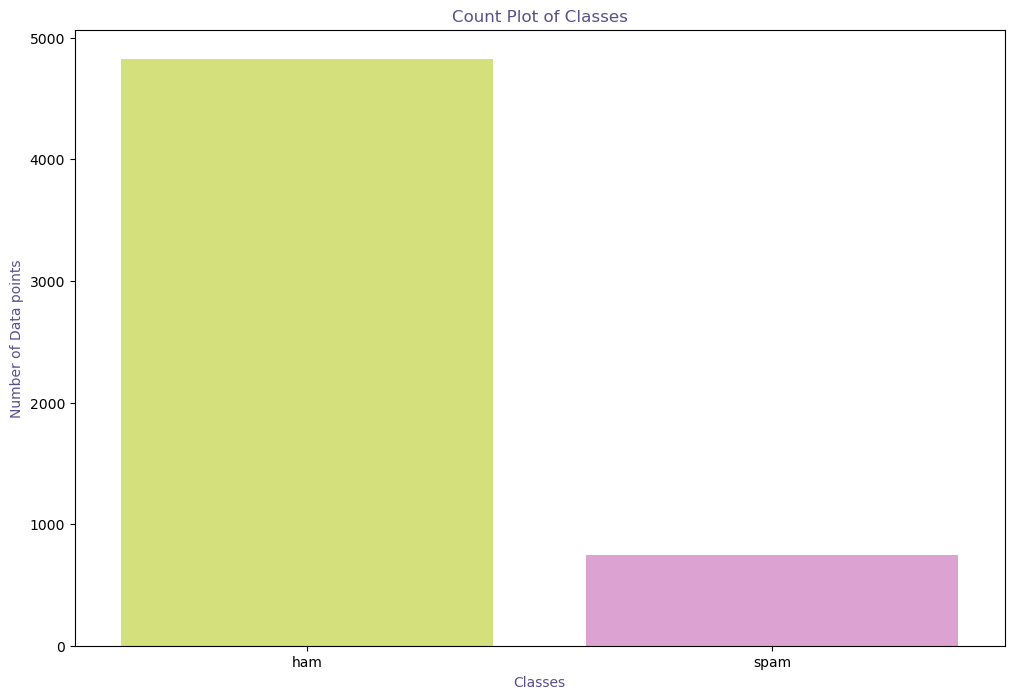

In [17]:
# Palette for colors
cols = ["#E1F16B", "#E598D8"]

# First of all, let us evaluate the target and find out if our data is imbalanced or not
plt.figure(figsize=(12, 8))
# Assigning `data["Category"]` to both `x` and `hue` as suggested
fg = sns.countplot(x=data["Category"], hue=data["Category"], dodge=False, palette=cols, legend=False)
fg.set_title("Count Plot of Classes", color="#58508d")
fg.set_xlabel("Classes", color="#58508d")
fg.set_ylabel("Number of Data points", color="#58508d")

## Feature Engineering

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ssour\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [24]:
#Adding a column of numbers of charachters,words and sentences in each msg
data["No_of_Characters"] = data["Message"].apply(len)
data["No_of_Words"]=data.apply(lambda row: nltk.word_tokenize(row["Message"]), axis=1).apply(len)
data["No_of_sentence"]=data.apply(lambda row: nltk.sent_tokenize(row["Message"]), axis=1).apply(len)

data.describe().T

#PS. At this step, I tokenised the words and sentences and used the length of the same. 
#More on Tokenizing later in the notebook.

,count,mean,std,min,25%,50%,75%,max
No_of_Characters,5572.0,80.118808,59.690841,2.0,36.0,61.0,121.0,910.0
No_of_Words,5572.0,18.699390,13.741932,1.0,9.0,15.0,27.0,220.0
No_of_sentence,5572.0,1.996411,1.520159,1.0,1.0,1.5,2.0,38.0


<Figure size 1200x800 with 0 Axes>

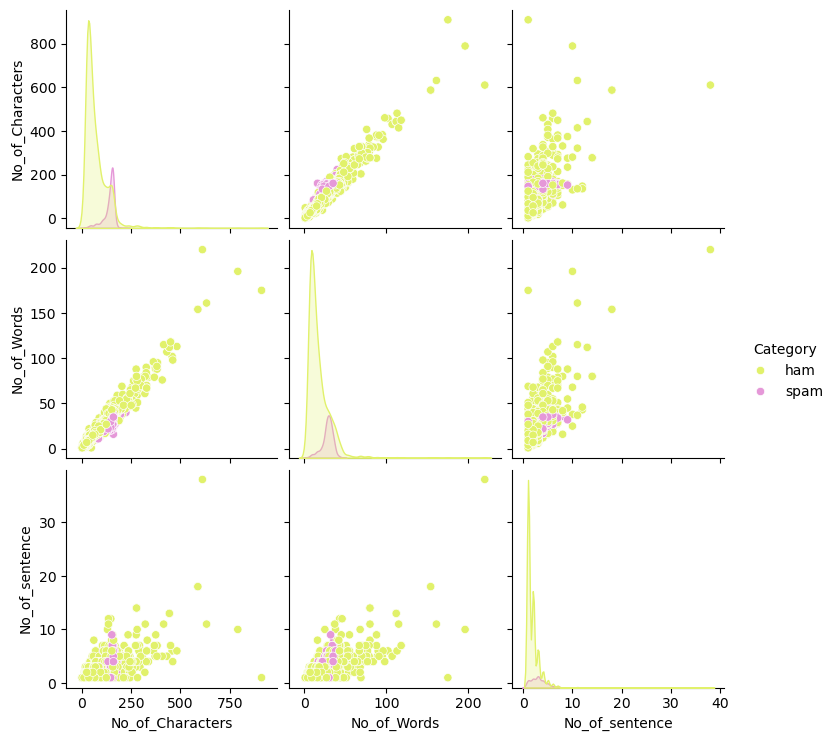

In [28]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="Category",palette=cols)
plt.show(fg)

## Outlier Detection

In [31]:
#Dropping the outliers. 
data = data[(data["No_of_Characters"]<350)]
data.shape

(5548, 5)

<Figure size 1200x800 with 0 Axes>

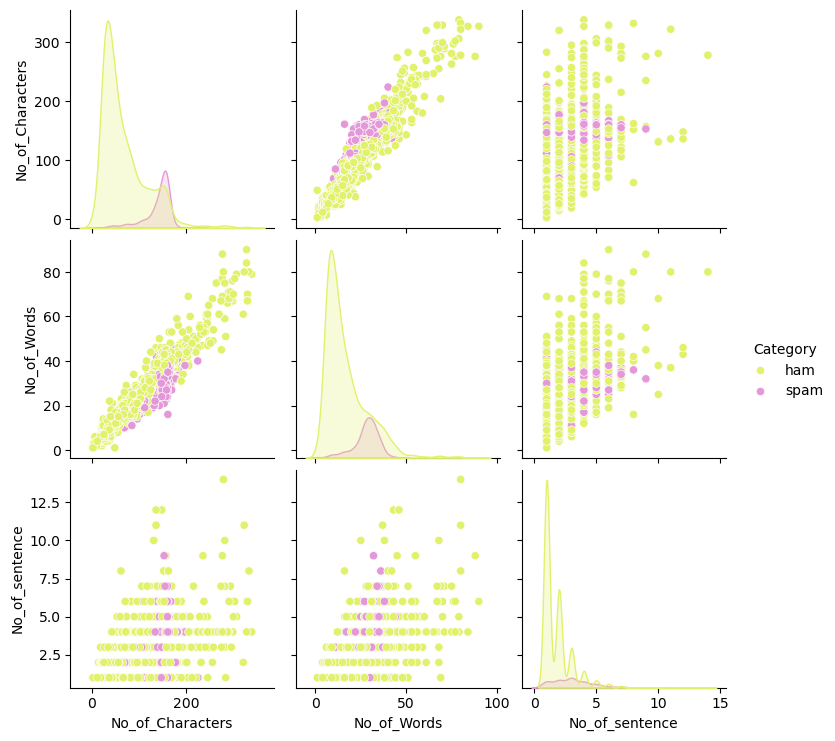

In [35]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="Category",palette=cols)
plt.show(fg)

## Data Preprocessing

In [38]:
#Lets have a look at a sample of texts before cleaning
print("\033[1m\u001b[45;1m The First 5 Texts:\033[0m",*data["Message"][:5], sep = "\n")

 The First 5 Texts:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though


In [42]:
# Defining a function to clean up the text
def Clean(Text):
    sms = re.sub('[^a-zA-Z]', ' ', Text)  # Replacing all non-alphabetic characters with a space
    sms = sms.lower()  # Converting to lowercase
    sms = sms.split()
    sms = ' '.join(sms)
    return sms

# Applying the function using .loc to avoid the SettingWithCopyWarning
data.loc[:, "Clean_Text"] = data["Message"].apply(Clean)

# Let's have a look at a sample of texts after cleaning
print("\033[1m\u001b[45;1m The First 5 Texts after cleaning:\033[0m", *data["Clean_Text"][:5], sep="\n")

 The First 5 Texts after cleaning:
go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
ok lar joking wif u oni
free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
u dun say so early hor u c already then say
nah i don t think he goes to usf he lives around here though


### Tokenization

In [55]:
# Using .loc to set values on a DataFrame
data.loc[:, "Tokenize_Text"] = data.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)

# Printing the first 5 tokenized texts
print("\033[1m\u001b[45;1m The First 5 Texts after Tokenizing:\033[0m", *data["Tokenize_Text"][:5], sep="\n")

 The First 5 Texts after Tokenizing:
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', 'over', 's']
['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']
['nah', 'i', 'don', 't', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']


### Removing Stop Words

In [61]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ssour\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [63]:
# Removing the stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

data["Nostopword_Text"] = data["Tokenize_Text"].apply(remove_stopwords)

print("\033[1m\u001b[45;1m The First 5 Texts after removing the stopwords:\033[0m",*data["Nostopword_Text"][:5], sep = "\n")

 The First 5 Texts after removing the stopwords:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']
